<font size="7"> **Group Data Challenge - Migros**</font>

# Import modules

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Import dataset from UrbanDataLabs

In [164]:
ds_udl = pd.read_csv("../data/GeoFeatures_Zurich_provided_by_UrbanDataLabs.csv")

# Dataset description
- x, y: Coordinates in EPSG 2056
- lat, lng: Coordinates in latitude, longitude
- hh_ha, pers_ha: Density of households and persons per hectare
- pt_class: Public transport quality class according to Federal Office for Spatial Development
- pt_dis: Distance to next stop (as the crow flies)
- station_dis: Distance to railway station
- noise_street: Road noise according to BAFU
- bldg_foot: Building footprint in m²
- bldg_corner: Building is located at an intersection
- bldg_500: Number of buildings in 500m radius
- net_acc: Size of catchment area in 2 min driving time (https://en.wikipedia.org/wiki/Catchment_area)

In [165]:
ds_udl

,x,y,geom,hh_ha,pers_ha,pt_class,pt_dis,station_dis,noise_street,bldg_foot,bldg_corner,bldg_500,net_acc,lat,lng
0,2682762.5,1246387.5,01010000200808000000000040C577444100000080B304...,8,10,1.0,55,1725,45,4204,t,1402050,1043508.0,47.3631,8.53425
1,2682762.5,1246412.5,01010000200808000000000040C577444100000080CC04...,53,100,1.0,50,1700,69,4204,t,1402050,1043508.0,47.3634,8.53425
2,2682787.5,1246337.5,010100002008080000000000C0D1774441000000808104...,8,10,1.0,75,1770,58,4204,t,1402050,1043508.0,47.3627,8.53457
3,2682787.5,1246362.5,010100002008080000000000C0D1774441000000809A04...,8,10,1.0,55,1745,56,4204,t,1402050,1043508.0,47.3629,8.53457
4,2682787.5,1246387.5,010100002008080000000000C0D177444100000080B304...,8,10,1.0,35,1720,63,4204,t,1402050,1043508.0,47.3631,8.53458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126326,2682737.5,1246362.5,010100002008080000000000C0B8774441000000809A04...,8,10,1.0,90,1755,67,4204,t,1402050,1043508.0,47.3629,8.53391
126327,2682737.5,1246387.5,010100002008080000000000C0B877444100000080B304...,8,10,1.0,75,1730,65,4204,t,1402050,1043508.0,47.3631,8.53392
126328,2682737.5,1246412.5,010100002008080000000000C0B877444100000080CC04...,53,100,1.0,75,1710,69,4204,t,1402050,1043508.0,47.3634,8.53392
126329,2682762.5,1246337.5,01010000200808000000000040C5774441000000808104...,8,10,1.0,90,1775,59,4204,t,1402050,1043508.0,47.3627,8.53424


# Initial Data Exploration

In [166]:
ds_udl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126331 entries, 0 to 126330
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   x             126331 non-null  float64
 1   y             126331 non-null  float64
 2   geom          126331 non-null  object 
 3   hh_ha         126331 non-null  int64  
 4   pers_ha       126331 non-null  int64  
 5   pt_class      122870 non-null  float64
 6   pt_dis        126331 non-null  int64  
 7   station_dis   126331 non-null  int64  
 8   noise_street  126331 non-null  int64  
 9   bldg_foot     126331 non-null  int64  
 10  bldg_corner   126331 non-null  object 
 11  bldg_500      126331 non-null  int64  
 12  net_acc       123468 non-null  float64
 13  lat           126331 non-null  float64
 14  lng           126331 non-null  float64
dtypes: float64(6), int64(7), object(2)
memory usage: 14.5+ MB


- <font size="5">**Testing for NaN values**</font>

In [167]:
ds_udl.isnull().values.any()

True

In [168]:
ds_udl.isnull().sum()

x                  0
y                  0
geom               0
hh_ha              0
pers_ha            0
pt_class        3461
pt_dis             0
station_dis        0
noise_street       0
bldg_foot          0
bldg_corner        0
bldg_500           0
net_acc         2863
lat                0
lng                0
dtype: int64

In [169]:
ds_udl[ds_udl.isna().any(axis=1)]

,x,y,geom,hh_ha,pers_ha,pt_class,pt_dis,station_dis,noise_street,bldg_foot,bldg_corner,bldg_500,net_acc,lat,lng
270,2676237.5,1252487.5,010100002008080000000000C0066B444100000080871C...,0,0,NaN,475,8235,52,92,f,132755,682.0,47.4188,8.44892
271,2676262.5,1252412.5,01010000200808000000000040136B4441000000803C1C...,0,0,NaN,430,8175,52,92,f,132755,682.0,47.4181,8.44924
272,2676262.5,1252437.5,01010000200808000000000040136B444100000080551C...,0,0,NaN,450,8190,52,92,f,132755,682.0,47.4183,8.44924
273,2676262.5,1252462.5,01010000200808000000000040136B4441000000806E1C...,0,0,NaN,470,8200,54,92,f,132755,682.0,47.4186,8.44925
274,2676262.5,1252487.5,01010000200808000000000040136B444100000080871C...,0,0,NaN,490,8215,49,92,f,132755,682.0,47.4188,8.44925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125711,2678012.5,1247262.5,010100002008080000000000407E6E4441000000801E08...,0,0,4.0,705,5235,74,142,f,960,NaN,47.3716,8.47153
125712,2678012.5,1247287.5,010100002008080000000000407E6E4441000000803708...,0,0,4.0,720,5230,64,142,f,960,NaN,47.3718,8.47153
125713,2678037.5,1247187.5,010100002008080000000000C08A6E444100000080D307...,0,0,4.0,690,5220,76,142,f,960,NaN,47.3709,8.47184
125714,2678037.5,1247212.5,010100002008080000000000C08A6E444100000080EC07...,0,0,4.0,700,5215,70,142,f,960,NaN,47.3711,8.47185


- <font size="5">**Cleaning the dataset**</font>

In [170]:
ds_udl_clean = ds_udl.dropna()
ds_udl_clean

,x,y,geom,hh_ha,pers_ha,pt_class,pt_dis,station_dis,noise_street,bldg_foot,bldg_corner,bldg_500,net_acc,lat,lng
0,2682762.5,1246387.5,01010000200808000000000040C577444100000080B304...,8,10,1.0,55,1725,45,4204,t,1402050,1043508.0,47.3631,8.53425
1,2682762.5,1246412.5,01010000200808000000000040C577444100000080CC04...,53,100,1.0,50,1700,69,4204,t,1402050,1043508.0,47.3634,8.53425
2,2682787.5,1246337.5,010100002008080000000000C0D1774441000000808104...,8,10,1.0,75,1770,58,4204,t,1402050,1043508.0,47.3627,8.53457
3,2682787.5,1246362.5,010100002008080000000000C0D1774441000000809A04...,8,10,1.0,55,1745,56,4204,t,1402050,1043508.0,47.3629,8.53457
4,2682787.5,1246387.5,010100002008080000000000C0D177444100000080B304...,8,10,1.0,35,1720,63,4204,t,1402050,1043508.0,47.3631,8.53458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126326,2682737.5,1246362.5,010100002008080000000000C0B8774441000000809A04...,8,10,1.0,90,1755,67,4204,t,1402050,1043508.0,47.3629,8.53391
126327,2682737.5,1246387.5,010100002008080000000000C0B877444100000080B304...,8,10,1.0,75,1730,65,4204,t,1402050,1043508.0,47.3631,8.53392
126328,2682737.5,1246412.5,010100002008080000000000C0B877444100000080CC04...,53,100,1.0,75,1710,69,4204,t,1402050,1043508.0,47.3634,8.53392
126329,2682762.5,1246337.5,01010000200808000000000040C5774441000000808104...,8,10,1.0,90,1775,59,4204,t,1402050,1043508.0,47.3627,8.53424


 - <font size="5">**Some basic statistics**</font>

In [171]:
ds_udl_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x,120392.0,2.681862e+06,3609.551948,2.674688e+06,2.679088e+06,2.682088e+06,2.684638e+06,2.688488e+06
y,120392.0,1.249883e+06,2231.453564,1.245862e+06,1.247988e+06,1.250062e+06,1.251712e+06,1.253988e+06
hh_ha,120392.0,2.648015e+01,33.615073,0.000000e+00,0.000000e+00,1.300000e+01,4.300000e+01,2.550000e+02
pers_ha,120392.0,5.467792e+01,66.592057,0.000000e+00,0.000000e+00,3.000000e+01,9.000000e+01,5.460000e+02
pt_class,120392.0,1.995814e+00,0.995542,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
pt_dis,120392.0,1.965052e+02,129.531961,0.000000e+00,1.100000e+02,1.750000e+02,2.500000e+02,1.290000e+03
station_dis,120392.0,4.072582e+03,2012.100780,5.500000e+01,2.580000e+03,3.905000e+03,5.220000e+03,9.680000e+03
noise_street,120392.0,5.415666e+01,10.917718,0.000000e+00,4.700000e+01,5.300000e+01,6.100000e+01,9.700000e+01
bldg_foot,120392.0,1.637922e+03,3630.872945,2.300000e+01,2.300000e+02,4.780000e+02,1.245000e+03,3.390600e+04
bldg_500,120392.0,7.159643e+05,596532.363126,2.194000e+03,2.832020e+05,5.230855e+05,9.981210e+05,3.350409e+06


---
1. Mean density of households = 26.48 
2. Mean number of persons per hectare = 54.7
3. The centroid of all locations is represented by the following coordinates: https://goo.gl/maps/t6rc8zacUes9sGkS9
4. The column "bldg_500" has extreme values which could be seen as unplausible at first glance
---

- <font size="5">**Boxplots**</font>

Text(0.5, 1.0, 'Buildings in 500 meter radius')

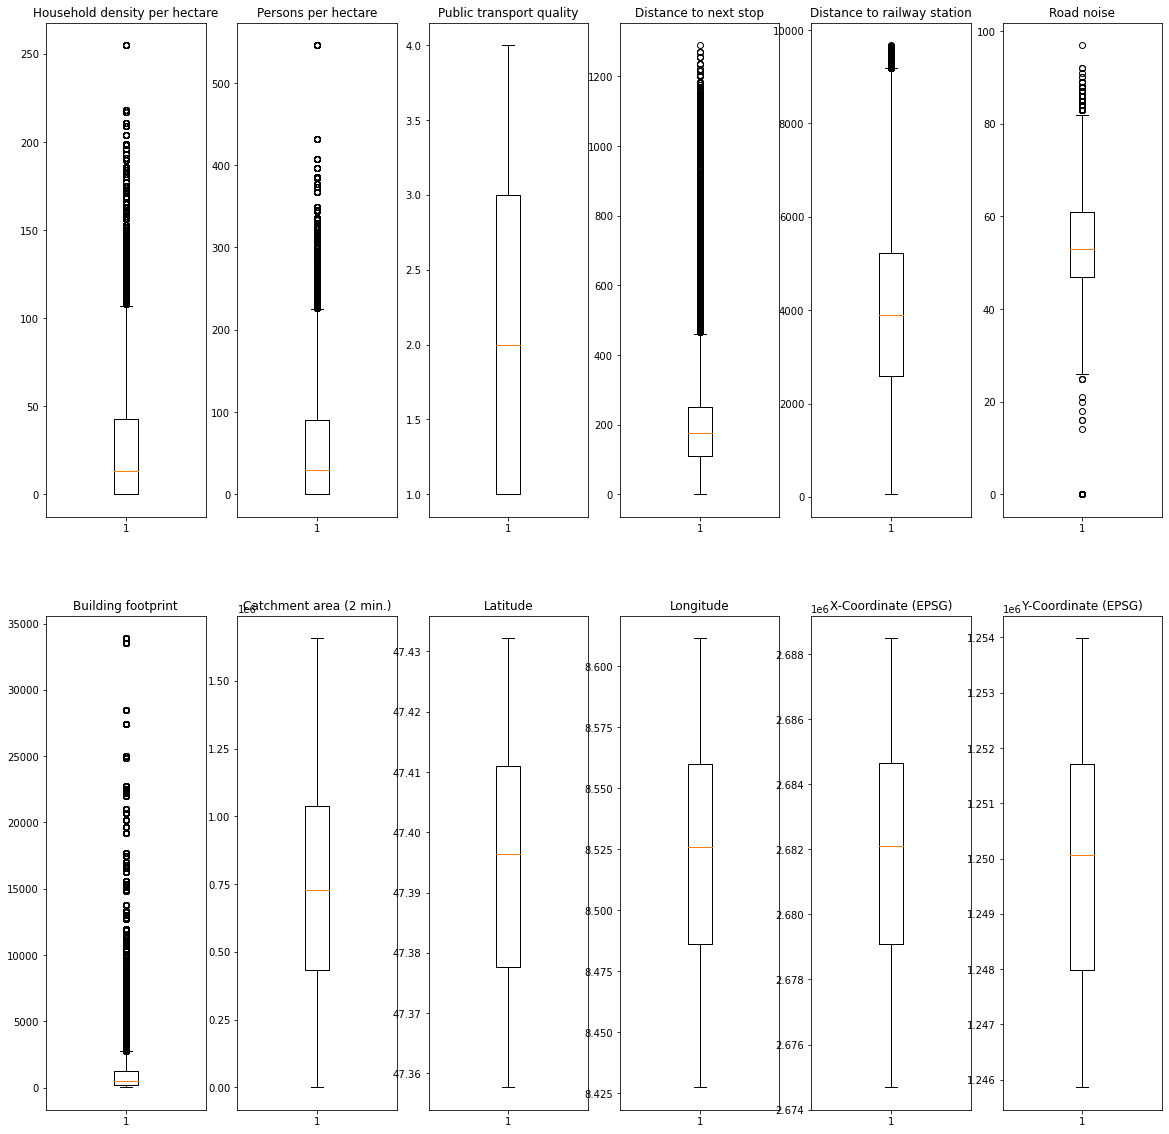

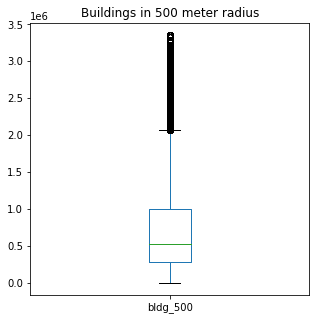

In [172]:
fig, ax = plt.subplots(2, 6, figsize=(20,20))
plt.figure(figsize=(5,5))
#sns.boxplot(data=ds_udl['hh_ha'],  orient='v' , ax=ax[0,0])
ax[0, 0].boxplot(ds_udl_clean['hh_ha'])
ax[0, 0].set_title("Household density per hectare")
ax[0, 1].boxplot(ds_udl_clean['pers_ha'])
ax[0, 1].set_title("Persons per hectare")
ax[0, 2].boxplot(ds_udl_clean['pt_class'])
ax[0, 2].set_title("Public transport quality")
ax[0, 3].boxplot(ds_udl_clean['pt_dis'])
ax[0, 3].set_title("Distance to next stop")
ax[0, 4].boxplot(ds_udl_clean['station_dis'])
ax[0, 4].set_title("Distance to railway station")
ax[0, 5].boxplot(ds_udl_clean['noise_street'])
ax[0, 5].set_title("Road noise")
ax[1, 0].boxplot(ds_udl_clean['bldg_foot'])
ax[1, 0].set_title("Building footprint")
ax[1, 1].boxplot(ds_udl_clean['net_acc'])
ax[1, 1].set_title("Catchment area (2 min.)")
ax[1, 2].boxplot(ds_udl_clean['lat'])
ax[1, 2].set_title("Latitude")
ax[1, 3].boxplot(ds_udl_clean['lng'])
ax[1, 3].set_title("Longitude")
ax[1, 4].boxplot(ds_udl_clean['x'])
ax[1, 4].set_title("X-Coordinate (EPSG)")
ax[1, 5].boxplot(ds_udl_clean['y'])
ax[1, 5].set_title("Y-Coordinate (EPSG)")

#boxplot(ds_udl['bldg_500'])
box_bldg500 = ds_udl_clean.boxplot(column=['bldg_500'], grid=False)
box_bldg500.set_title("Buildings in 500 meter radius")




- <font size="5">**Histograms**</font>

(array([12142., 10719., 11331., 11720., 11873., 15012., 14760., 13987.,
        10356.,  8492.]),
 array([1245862.5, 1246675. , 1247487.5, 1248300. , 1249112.5, 1249925. ,
        1250737.5, 1251550. , 1252362.5, 1253175. , 1253987.5]),
 <BarContainer object of 10 artists>)

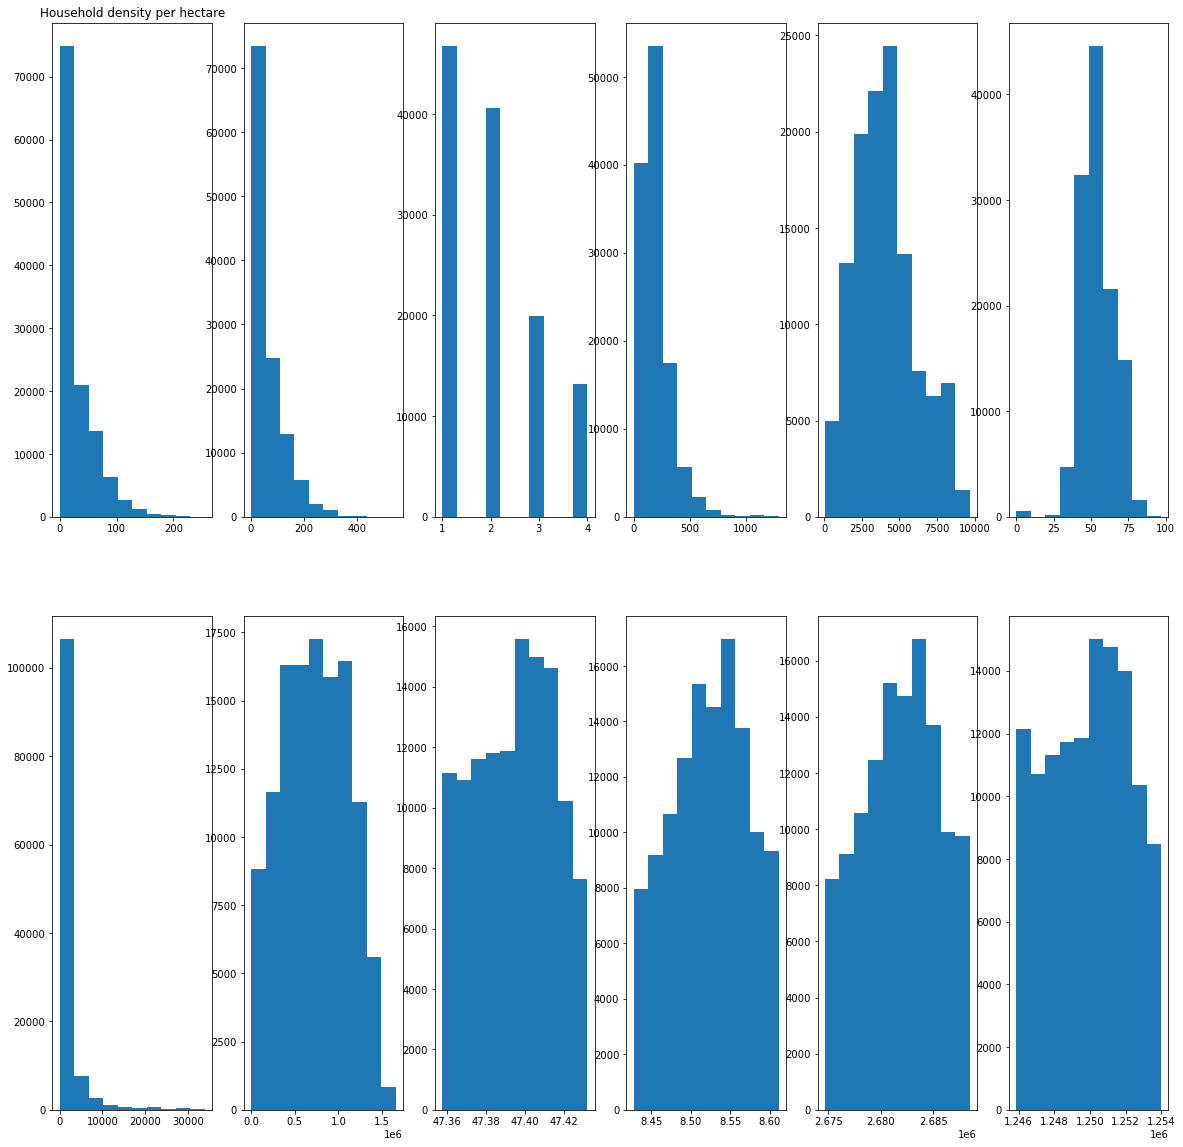

<Figure size 360x360 with 0 Axes>

In [173]:
fig, ax = plt.subplots(2, 6, figsize=(20,20))
plt.figure(figsize=(5,5))
ax[0,0].hist(x=ds_udl_clean['hh_ha'])
ax[0,0].set_title("Household density per hectare")
ax[0,1].hist(x=ds_udl_clean['pers_ha'])
ax[0,2].hist(x=ds_udl_clean['pt_class'])
ax[0,3].hist(x=ds_udl_clean['pt_dis'])
ax[0,4].hist(x=ds_udl_clean['station_dis'])
ax[0,5].hist(x=ds_udl_clean['noise_street'])
ax[1,0].hist(x=ds_udl_clean['bldg_foot'])
ax[1,1].hist(x=ds_udl_clean['net_acc'])
ax[1,2].hist(x=ds_udl_clean['lat'])
ax[1,3].hist(x=ds_udl_clean['lng'])
ax[1,4].hist(x=ds_udl_clean['x'])
ax[1,5].hist(x=ds_udl_clean['y'])

- <font size="5">**Correlation Matrix**</font>

In [217]:
corrMatrix = ds_udl.drop(['geom'], axis=1).corr()

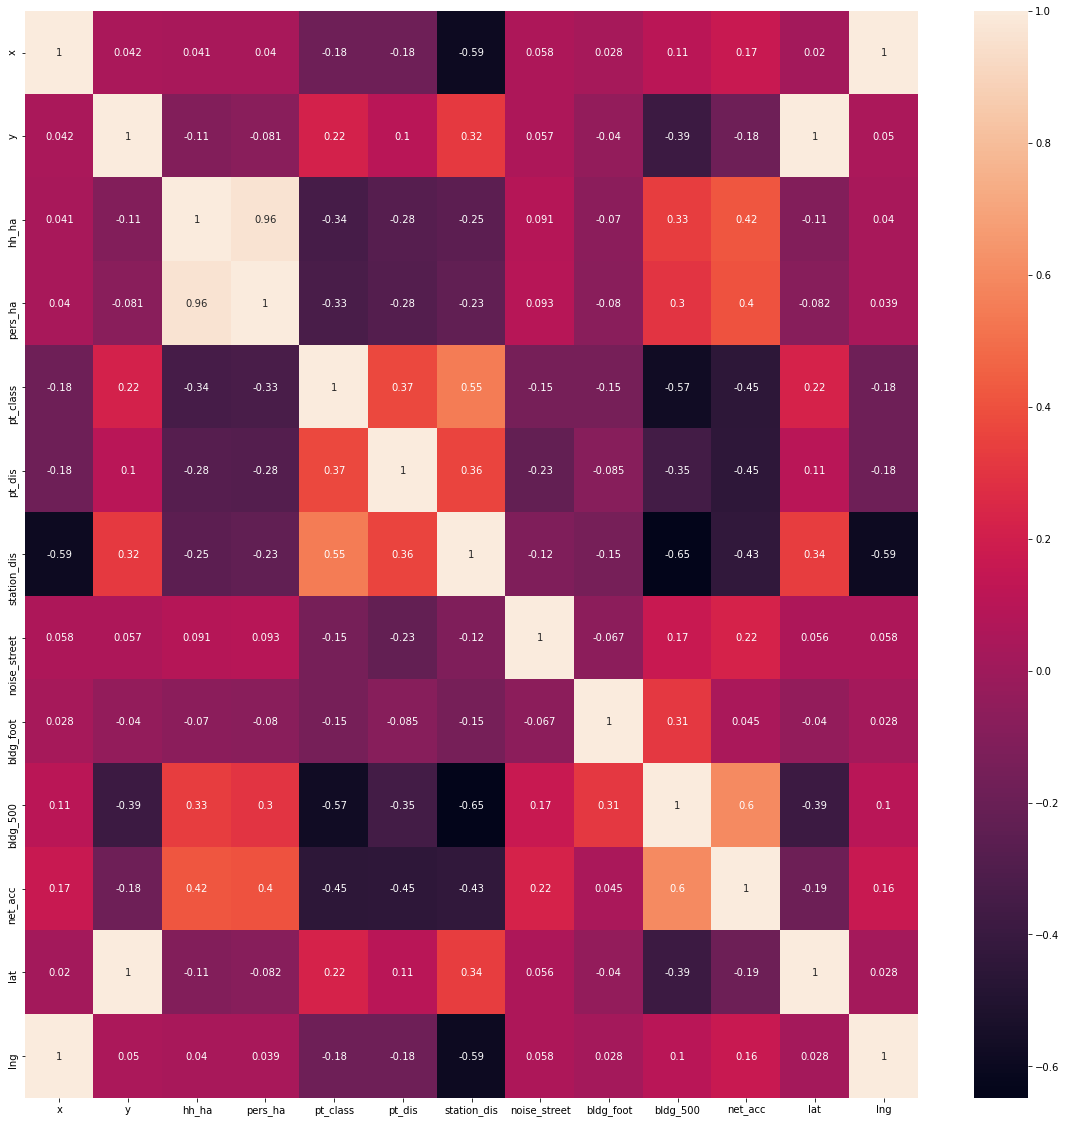

In [219]:
plt.figure(figsize=(20, 20))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [233]:
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
corrMatrixupper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(bool))  
# Convert to 1-D series and drop Null values
corrPairs = corrMatrixupper.unstack().dropna()
# Sort correlation pairs
corrMatrixsort = corrPairs.sort_values()
dfcorrPairs = pd.DataFrame(corrMatrixsort).reset_index()
dfcorrPairs.columns = ['P1-1', 'P1-2', 'correlation']

In [234]:
print("Correlation >= 0.5")
dfcorrPairs[dfcorrPairs['correlation'] >= 0.5]

Correlation >= 0.5


,P1-1,P1-2,correlation
73,station_dis,pt_class,0.546174
74,net_acc,bldg_500,0.599545
75,pers_ha,hh_ha,0.961563
76,lat,y,0.999747
77,lng,x,0.999964


In [235]:
print("Correlation <= -0.5")
dfcorrPairs[dfcorrPairs['correlation'] <= -0.5]

Correlation <= -0.5


,P1-1,P1-2,correlation
0,bldg_500,station_dis,-0.647647
1,station_dis,x,-0.592785
2,lng,station_dis,-0.589818
3,bldg_500,pt_class,-0.571832


 - **Location of coordinates in dataset**

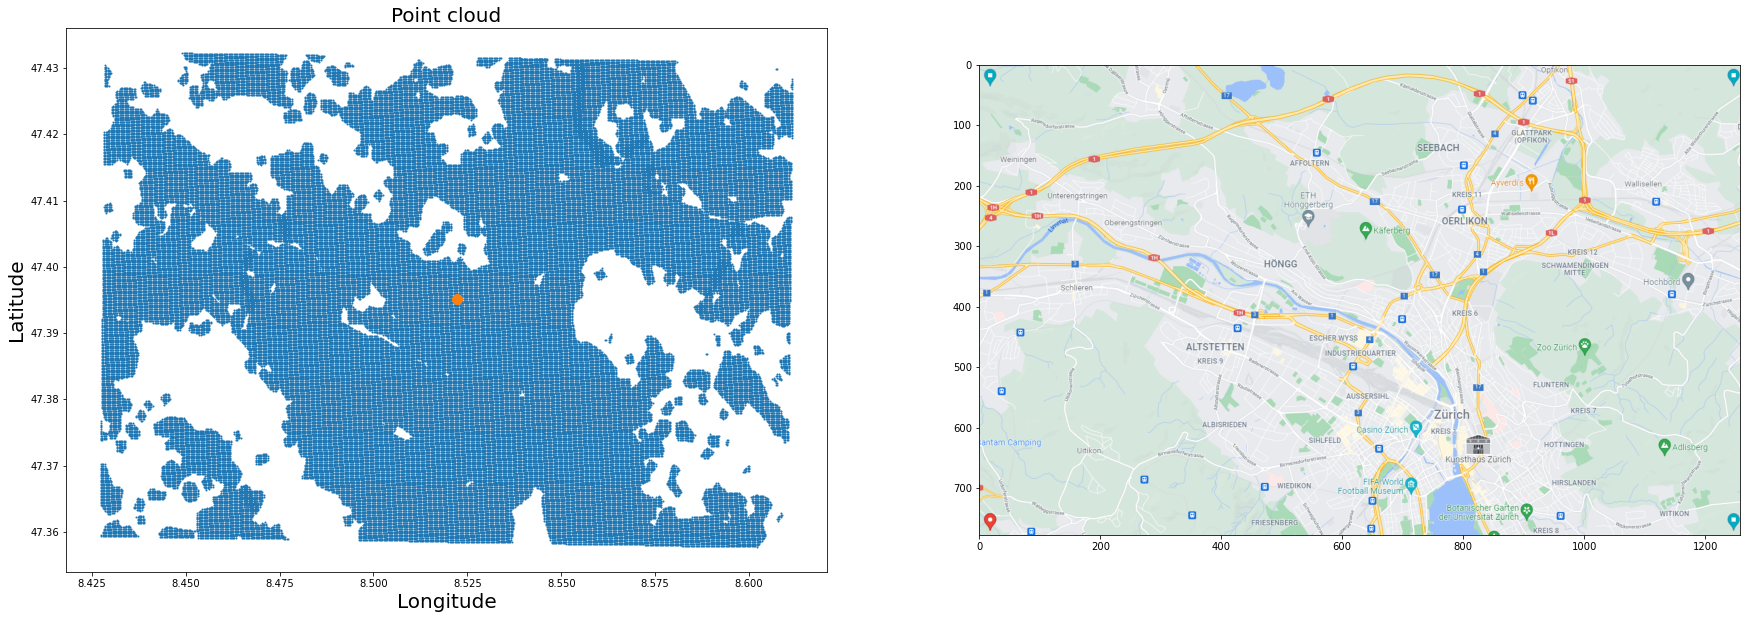

<Figure size 72x72 with 0 Axes>

In [174]:
mean_lat = ds_udl.describe().transpose().iloc[11,1]
mean_lng = ds_udl.describe().transpose().iloc[12,1]
# Calculating bounding box vallues
max_lat = ds_udl['lat'].max()
min_lat = ds_udl['lat'].min()
#print(max_lat)
#print(min_lat)
max_lng = ds_udl['lng'].max()
min_lng = ds_udl['lng'].min()
#print(max_lng)
#print(min_lng)

im = plt.imread("../data/GoogleMapsBoundingBox2raw_new.png")
fig, ax = plt.subplots(1, 2, figsize=(30,10))
plt.figure(figsize=(1,1))
ax[0].scatter(ds_udl['lng'], ds_udl['lat'], s=1)
ax[0].scatter(mean_lng, mean_lat, s=100)
ax[0].set_title('Point cloud', size=20)
ax[0].set_xlabel('Longitude', fontsize = 20)
ax[0].set_ylabel('Latitude', fontsize = 20)
ax[1].imshow(im)
plt.show()

> <font size="4">As we can see from the plot the locations contained in the UDL dataset match the urban area shown in the same region in Google Maps.</font>

- **Spatial distribution of persons per hectare**

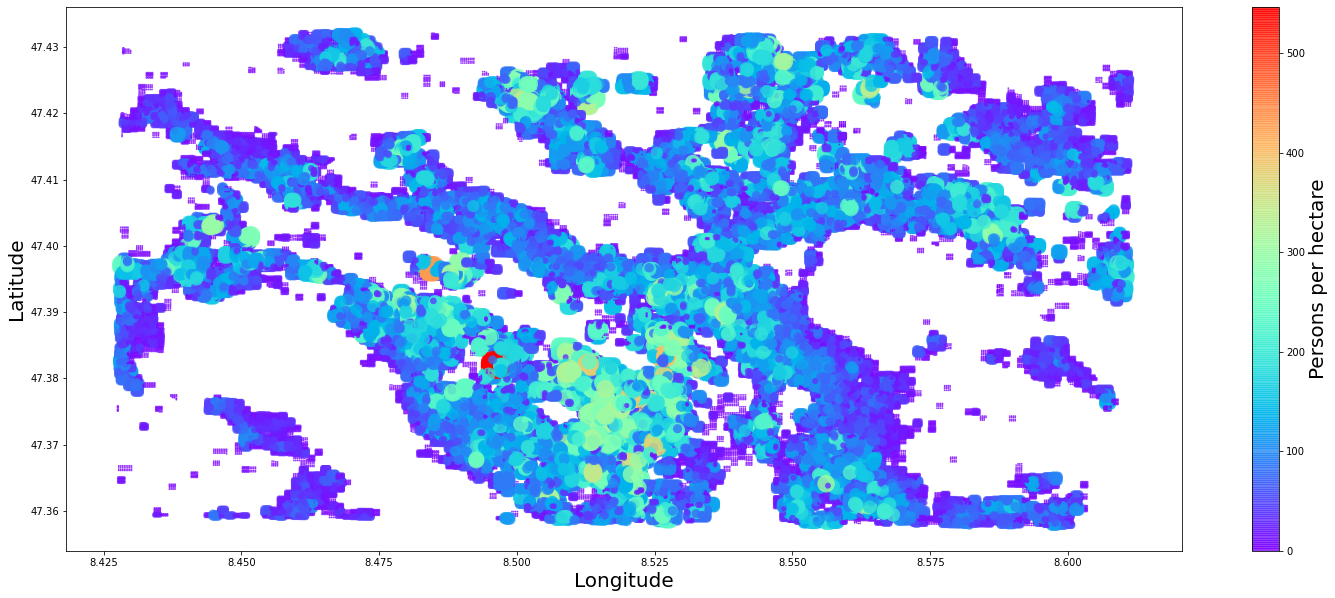

In [186]:
fig, ax = plt.subplots(1, 1, figsize=(25,10))
im1 = ax.scatter(ds_udl['lng'], ds_udl['lat'], alpha=0.8, edgecolors='none', s=ds_udl['pers_ha'], c=ds_udl['pers_ha'], cmap='rainbow')
ax.set_xlabel('Longitude', size = 20)
ax.set_ylabel('Latitude', size = 20)
#plt.figure(figsize=(10,10))
#plt.scatter(ds_udl['hh_ha'], ds_udl['pers_ha'],s=1)
#plt.xlabel('Houshold per hectare')
#plt.ylabel('Persons per hectare')
cbar = fig.colorbar(im1, ax=ax)
cbar.set_label('Persons per hectare', size=20)

- **Spatial distribution of housholds per hectare**

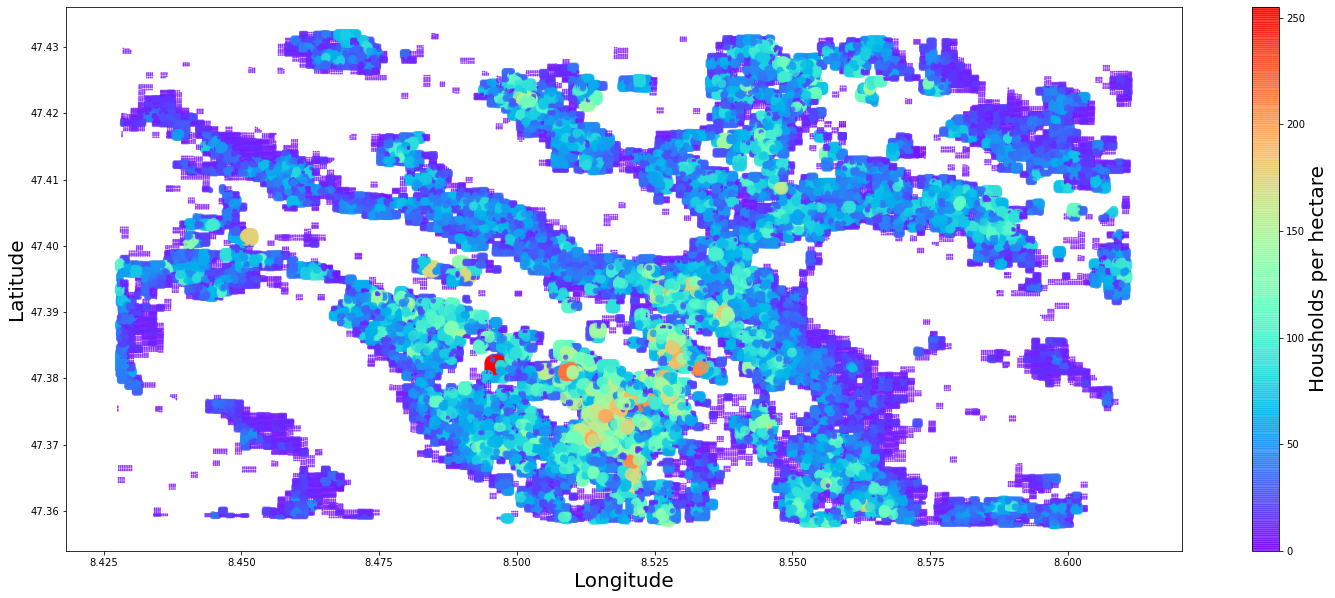

In [193]:
fig, ax = plt.subplots(1, 1, figsize=(25,10))

im2 = ax.scatter(ds_udl['lng'], ds_udl['lat'], alpha=0.8, edgecolors='none', s=ds_udl['hh_ha'], c=ds_udl['hh_ha'], cmap='rainbow')
ax.set_xlabel('Longitude', size = 20)
ax.set_ylabel('Latitude', size = 20)
#plt.figure(figsize=(10,10))
#plt.scatter(ds_udl['hh_ha'], ds_udl['pers_ha'],s=1)
#plt.xlabel('Houshold per hectare')
#plt.ylabel('Persons per hectare')
cbar = fig.colorbar(im2, ax=ax)
cbar.set_label('Housholds per hectare', size=20)

- **Spatial distribution of the number of buildings in a 500 meter radius**

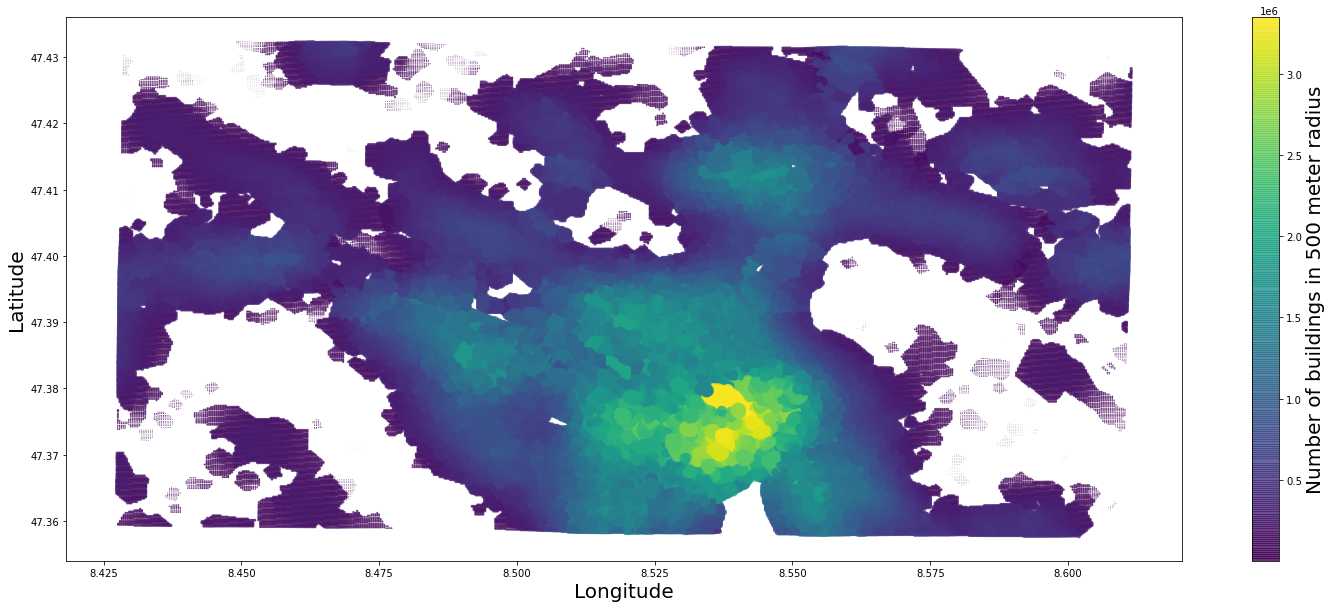

In [201]:
fig, ax = plt.subplots(1, 1, figsize=(25,10))
im3 = ax.scatter(ds_udl['lng'], ds_udl['lat'], alpha=0.8, edgecolors='none', s=0.00005*ds_udl['bldg_500'], c=ds_udl['bldg_500'], cmap='viridis')
ax.set_xlabel('Longitude', size = 20)
ax.set_ylabel('Latitude', size = 20)
#plt.figure(figsize=(10,10))
#plt.scatter(ds_udl['hh_ha'], ds_udl['pers_ha'],s=1)
#plt.xlabel('Houshold per hectare')
#plt.ylabel('Persons per hectare')
cbar = fig.colorbar(im3, ax=ax)
cbar.set_label('Number of buildings in 500 meter radius', size=20)